In [1]:
import pandas as pd
import datetime
import os

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
sns.set(color_codes=True)

# if matplotlib is not set inline, you will not see plots
%matplotlib inline 

In [3]:
targetdir = "./data/TraderTraderStrength/one_day_window/"
filename = "trader_strengthCDF_one_day_window.csv"

df = pd.read_csv(targetdir + filename)

In [4]:
df

,timestamp,totalDegree,strength_cumulative_probability,total_connections
0,1557183600000,36,0.001692,1264
1,1557183600000,33,0.003384,1264
2,1557183600000,17,0.006768,1264
3,1557183600000,17,0.006768,1264
4,1557183600000,14,0.010152,1264
...,...,...,...,...
2467587,1612738800000,1,1.000000,9718
2467588,1612738800000,1,1.000000,9718
2467589,1612738800000,1,1.000000,9718
2467590,1612738800000,1,1.000000,9718


In [5]:
df["timestamp"] = pd.to_datetime(df["timestamp"], unit='ms').dt.normalize()

In [6]:
df = df[["timestamp", "totalDegree"]]
df

,timestamp,totalDegree
0,2019-05-06,36
1,2019-05-06,33
2,2019-05-06,17
3,2019-05-06,17
4,2019-05-06,14
...,...,...
2467587,2021-02-07,1
2467588,2021-02-07,1
2467589,2021-02-07,1
2467590,2021-02-07,1


# Mean strength per day

In [7]:
df_mean = df.groupby(["timestamp"]).mean()
df_mean = df_mean.reset_index()
df_mean

,timestamp,totalDegree
0,2017-11-23,2.764706
1,2017-11-24,3.263158
2,2017-11-25,2.712000
3,2017-11-26,2.245614
4,2017-11-27,2.027586
...,...,...
1247,2021-04-23,4.146996
1248,2021-04-24,3.882958
1249,2021-04-25,3.975707
1250,2021-04-26,4.034553


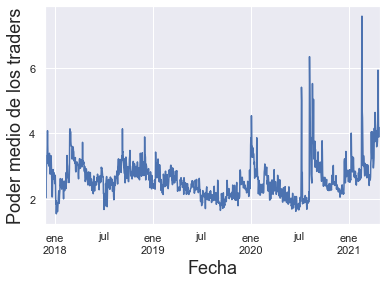

In [8]:
import locale
locale.setlocale(locale.LC_ALL, 'es_ES')

ax = df_mean.plot(kind = 'line', x = 'timestamp', y = 'totalDegree')
#ax.set_yscale('log')
ax.set_xlabel("Fecha", fontsize=18)
ax.set_ylabel("Poder medio de los traders", fontsize=18)
ax.get_legend().remove()
plt.rcParams["figure.figsize"] = (20,15)
matplotlib.rc('xtick', labelsize=18) 
matplotlib.rc('ytick', labelsize=18)

plt.savefig("./traderStrengthCDF/one_day_window/one_day_window_mean_trader_strengthCDF.svg", bbox_inches='tight')

# Median strength per day

In [9]:
df_median = df.groupby(["timestamp"]).median()
df_median = df_median.reset_index()
df_median

,timestamp,totalDegree
0,2017-11-23,1.0
1,2017-11-24,1.0
2,2017-11-25,1.0
3,2017-11-26,1.0
4,2017-11-27,1.0
...,...,...
1247,2021-04-23,2.0
1248,2021-04-24,1.0
1249,2021-04-25,2.0
1250,2021-04-26,2.0


In [10]:
df_median["totalDegree"].unique()

array([1., 2.])

In [15]:
df_median[df_median["totalDegree"] == 2].count()

timestamp      38
totalDegree    38
dtype: int64

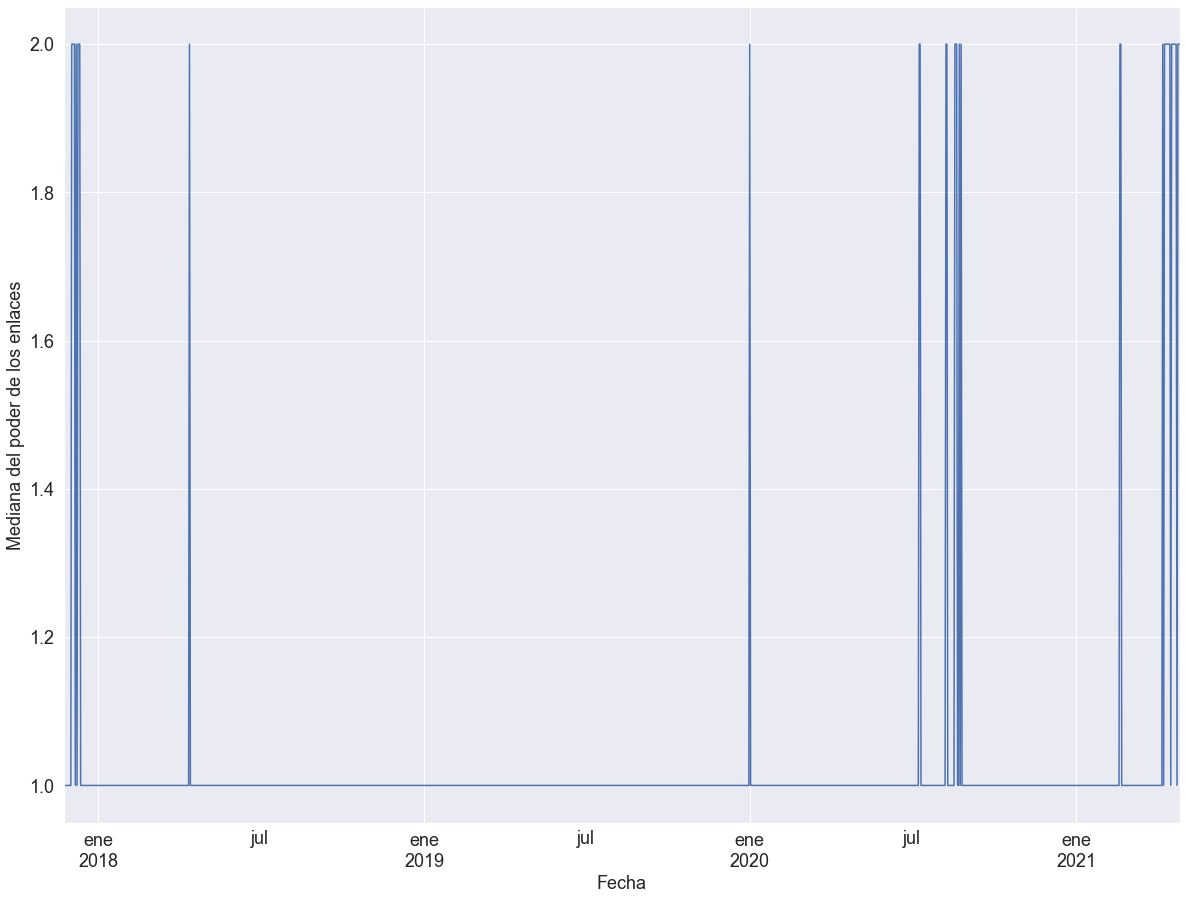

In [19]:
ax = df_median.plot(kind = 'line', x = 'timestamp', y = 'totalDegree')

#ax.set_yscale('log')
ax.set_xlabel("Fecha", fontsize=18)
ax.set_ylabel("Mediana del poder de los enlaces", fontsize=18)
ax.get_legend().remove()
#plt.legend(["Todos los activos"])
plt.rcParams["figure.figsize"] = (20,15)

plt.savefig("./traderStrengthCDF/one_day_window/one_day_window_median_trader_strengthCDF.svg", bbox_inches='tight')

# Max strength per day

In [20]:
df_max = df.groupby(["timestamp"]).max()
df_max = df_max.reset_index()
df_max

,timestamp,totalDegree
0,2017-11-23,88
1,2017-11-24,55
2,2017-11-25,39
3,2017-11-26,30
4,2017-11-27,33
...,...,...
1247,2021-04-23,1452
1248,2021-04-24,972
1249,2021-04-25,1690
1250,2021-04-26,2820


In [32]:
df_max[df_max["totalDegree"] > 1000][:30]

,timestamp,totalDegree
377,2018-12-05,1847
1198,2021-03-05,1377
1209,2021-03-16,1099
1216,2021-03-23,1269
1242,2021-04-18,1749
1243,2021-04-19,1389
1246,2021-04-22,1101
1247,2021-04-23,1452
1249,2021-04-25,1690
1250,2021-04-26,2820


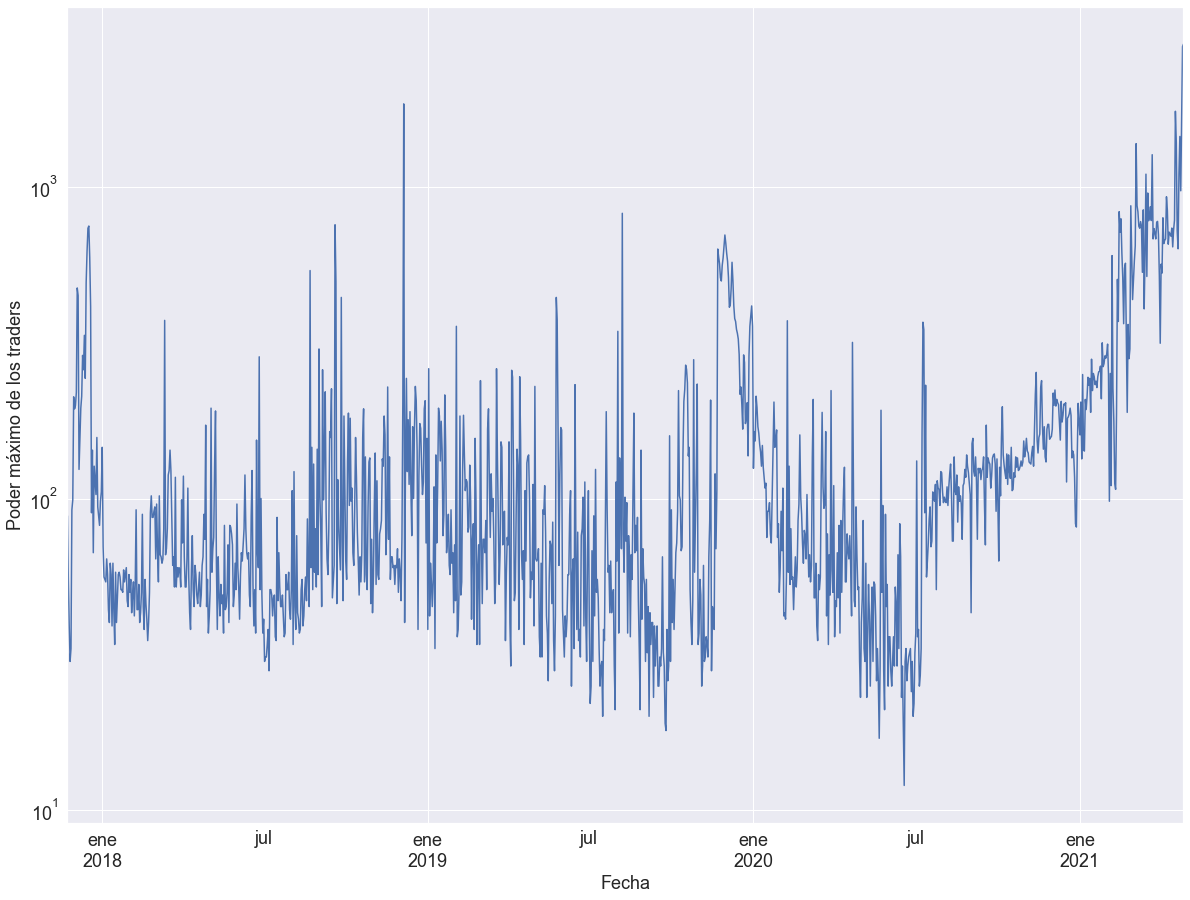

In [21]:
ax = df_max.plot(kind = 'line', x = 'timestamp', y = 'totalDegree')

ax.set_yscale('log')
ax.set_xlabel("Fecha", fontsize=18)
ax.set_ylabel("Poder máximo de los traders", fontsize=18)
ax.get_legend().remove()
plt.rcParams["figure.figsize"] = (20,15)

plt.savefig("./traderStrengthCDF/one_day_window/one_day_window_max_trader_strengthCDF.svg", bbox_inches='tight')

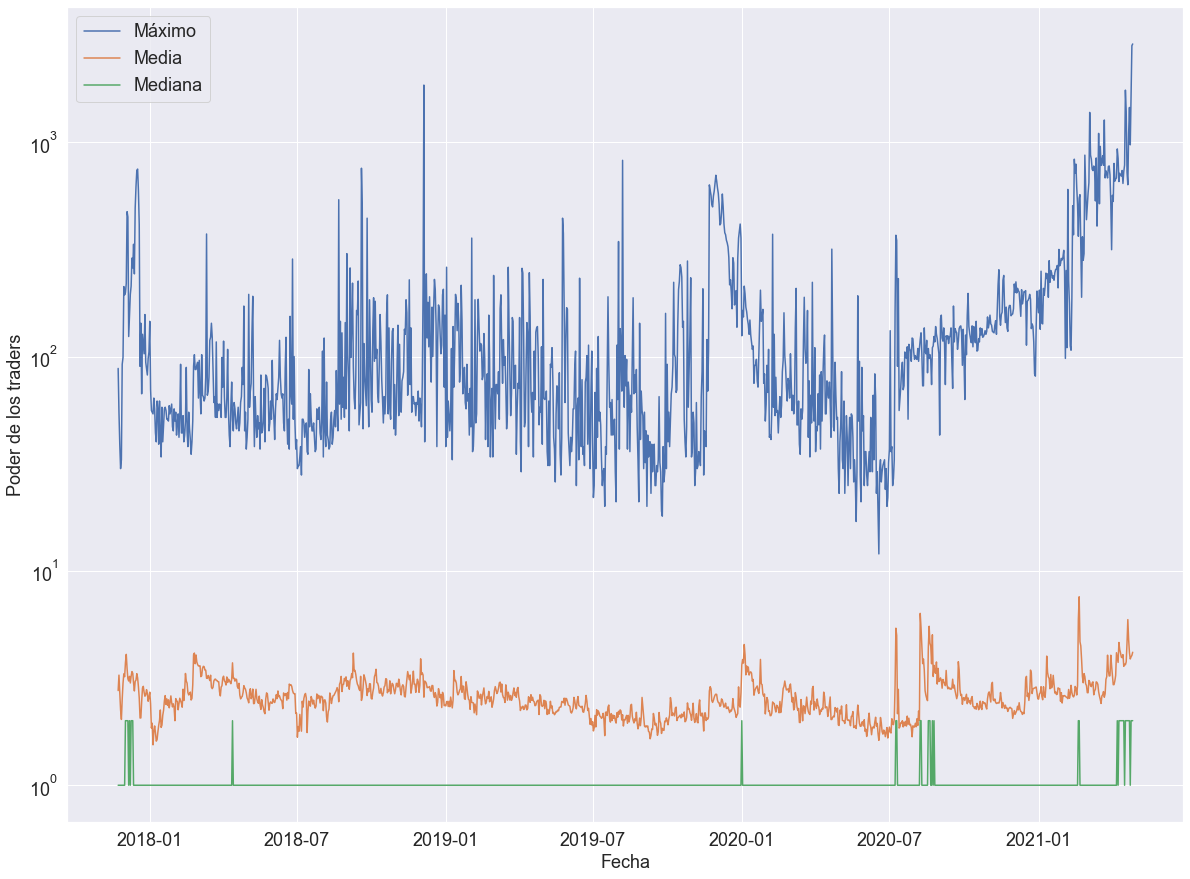

In [29]:
for frame in [df_max, df_mean, df_median]:
    plt.plot(frame['timestamp'], frame['totalDegree'])
    
plt.yscale('log')
plt.ylabel("Poder de los traders", fontsize=18)
plt.xlabel("Fecha", fontsize=18)
plt.legend(["Máximo", "Media", "Mediana"], prop={'size': 18})
matplotlib.rc('xtick', labelsize=18) 
matplotlib.rc('ytick', labelsize=18)
plt.figsize=(20, 15)

plt.savefig("./traderStrengthCDF/one_day_window/mean_median_max_strengthCDF.svg", bbox_inches='tight')